## 6. 정수 인코딩

컴퓨터는 숫자를 더 잘 이해하기에 텍스트를 숫자로 바꿔야하고 바꾸는 여러가지 기법들이 있다. 

이를 수행하기 위한 순서는 알듯이 토큰화 > 정제 및 추출이다. 이가 선행되어야 한다.

#### 1) 정수 인코딩

단어에 정수를 부여하는 방법 중 하나로 단어를 빈도수 순으로 정렬한 단어 집합(vocabulary)을 만들고, 빈도수가 높은 순서대로 차례로 낮은 숫자부터 정수를 부여하는 방법

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# 문장 토큰화
sentences = sent_tokenize(raw_text)
print(sentences)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 정제 및 추출
# 1. 소문자화, 2. 단어 길이 2 이하 제거

vocab = {}
preprocessed_sentences = []
stop_words = set(stopwords.words('english'))

for sentence in sentences:
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []

    for word in tokenized_sentence: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄인다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거한다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거한다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0 
                vocab[word] += 1 
    preprocessed_sentences.append(result) 
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [ ]:
# 인코딩하는 작업이지 엄밀히 말하면 단어 사전은 아님(하지만 책에서는 단어 집합이라고 표현한다. 아니라고 보기도 어렵기 때문이다.)
# 단어 사전은 단어에 인덱스를 부여하고 단어 개수만큼 배열을 만들어서 인덱스와 단어를 매칭하는 개념
print('단어 집합 :',vocab)

단어 집합 : {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


높은 빈도수를 가진 단어일수록 낮은 정수 부여, 정수는 1부터 부여한다.

In [ ]:
# 빈도수가 높은 순으로 정렬
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


1의 인덱스를 가진 단어가 가장 빈도수가 높은 단어가 됩니다. 그리고 이러한 작업을 수행하는 동시에 각 단어의 빈도수를 알 경우에만 할 수 있는 전처리인 빈도수가 적은 단어를 제외시키는 작업을 수행

등장 빈도가 낮은 단어는 자연어 처리에서 의미를 가지지 않을 가능성이 높기 때문이다.

In [ ]:
word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # 빈도수가 작은 단어는 제외.
        i = i + 1
        word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [ ]:
vocab_size = 5

# 인덱스가 5 초과인 단어 제거
words_frequency = [word for word, index in word_to_index.items() if index >= vocab_size + 1]

# 해당 단어에 대한 인덱스 정보를 삭제
for w in words_frequency:
    del word_to_index[w] # words_frequency에 속한다면 w2i에서 del하라
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


word_to_index를 사용하여 단어 토큰화가 된 상태로 저장된 sentences에 있는 각 단어를 정수로 바꾸는 작업을 해보자

예를 들어 sentences에서 첫번째 문장은 ['barber', 'person']이었는데, 이 문장에 대해서는 [1, 5]로 인코딩합니다. 그런데 두번째 문장인 ['barber', 'good', 'person']에는 더 이상 word_to_index에는 존재하지 않는 단어인 'good'이라는 단어가 있다.

이처럼 단어 집합에 존재하지 않는 단어들이 생기는 상황을 Out-Of-Vocabulary(단어 집합에 없는 단어) 문제라고 한다.

이러한 것을 처리할 때 w2i에 'oov'라는 키를 만들고 맨 마지막에 붙인다.

In [ ]:
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


이제 word_to_index를 사용하여 sentences의 모든 단어들을 맵핑되는 정수로 인코딩

In [ ]:
encoded_sentences = [] # 문단 전체
for sentence in preprocessed_sentences:
    encoded_sentence = [] # 문장 하나
    for word in sentence:
        try:
            # 단어 집합에 있는 단어라면 해당 단어의 정수를 리턴.
            encoded_sentence.append(word_to_index[word])
        except KeyError:
            # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴.
            encoded_sentence.append(word_to_index['OOV'])
    encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


#### 2) 케라스의 텍스트 전처리

위 작업을 빨리 하기 위해 케라스를 사용하기를 권장한다.



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

fit_on_texts는 입력한 텍스트로부터 단어 빈도수가 높은 순으로 낮은 정수 인덱스를 부여하는데, 정확히 앞서 설명한 정수 인코딩 작업이 이루어진다

In [ ]:
tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(preprocessed_sentences) 

In [ ]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


texts_to_sequences()는 입력으로 들어온 코퍼스에 대해서 각 단어를 이미 정해진 인덱스로 변환한다.

In [ ]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


앞서 빈도수가 가장 높은 단어 n개만을 사용하기 위해서 most_common()을 사용했다. 케라스 토크나이저에서는 tokenizer = Tokenizer(num_words=숫자)와 같은 방법으로 빈도수가 높은 상위 몇 개의 단어만 사용하겠다고 지정할 수 있다.

이때 5개를 남기고 싶으면 6을 해야한다. 실질적으로 숫자 0에 지정된 단어가 존재하지 않는데도 케라스 토크나이저가 숫자 0까지 단어 집합의 크기로 산정하는 이유는 자연어 처리에서 패딩(padding)이라는 작업 때문이다.

In [ ]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(preprocessed_sentences)

In [ ]:
# 하지만 여전히 13개이다??
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


코퍼스에 대해서 각 단어를 이미 정해진 인덱스로 변환하는데, 상위 5개의 단어만을 사용하겠다고 지정하였으므로 1번 단어부터 5번 단어까지만 보존되고 나머지 단어들은 제거된 것을 볼 수 있다. 

이건 oov를 지정할 수 없으니 6도 없다.

In [ ]:
# 실제 적용은 texts_to_sequences를 할 때 적용이 된다.
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


케라스 토크나이저는 기본적으로 단어 집합에 없는 단어인 OOV에 대해서는 단어를 정수로 바꾸는 과정에서 아예 단어를 제거한다는 특징이 있다. 단어 집합에 없는 단어들은 OOV로 간주하여 보존하고 싶다면 oov_token 인자를 사용한다.

만약 oov_token을 사용하기로 했다면 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 하ㅁ

따라서 상위 5개의 단어는 2!6의 인덱스를 가진다.

In [ ]:
# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(preprocessed_sentences)

In [ ]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


## 7. 패딩
자연어 처리를 하다보면 각 문장(또는 문서)은 서로 길이가 다를 수 있습니다. 그런데 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있다.

즉, 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요할 때가 있다.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


#### 1) 넘파이 패딩

모두 동일한 길이로 맞춰주기 위해서 이 중에서 가장 길이가 긴 문장의 길이를 계산해보겠다. 모든 문장의 길이를 7로 맞추겠다. 

이때 가상의 단어 'PAD'를 사용한다. 'PAD'라는 단어가 있다고 가정하고, 이 단어는 0번 단어라고 정의합니다. 길이가 7보다 짧은 문장에는 숫자 0을 채워서 길이 7로 맞춰준다.(아까 keras에서 idx 0을 pad로 본다고 했다.)

In [ ]:
# 모두 동일한 길이로 맞춰주기 위해서 이 중에서 가장 길이가 긴 문장의 길이를 계산

max_len = max(len(item) for item in encoded)
print('최대 길이 :',max_len)

최대 길이 : 7


0번 단어는 사실 아무런 의미도 없는 단어이기 때문에 자연어 처리하는 과정에서 기계는 0번 단어를 무시하게 된다.

이와 같이 데이터에 특정 값을 채워서 데이터의 크기(shape)를 조정하는 것을 패딩(padding)이라고 한다.

In [ ]:
for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

#### 2) 케라스 패딩

기본적으로 pad를 문서의 뒤가 아니라 앞에 채운다. 뒤에 하고 싶으면 post 인자를 준다

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [ ]:
# 케라스의 padding
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]], dtype=int32)

In [ ]:
# 뒤에 채우기
padded = pad_sequences(encoded, padding='post')
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]], dtype=int32)

지금까지는 가장 긴 길이를 가진 문서의 길이를 기준으로 패딩을 한다고 가정하였지만, 실제로는 꼭 가장 긴 문서의 길이를 기준으로 해야하는 것은 아니다. 가령, 모든 문서의 평균 길이가 20인데 문서 1개의 길이가 5,000이라고 해서 굳이 모든 문서의 길이를 5,000으로 패딩할 필요는 없을 수 있다.


길이가 5보다 짧은 문서들은 0으로 패딩되고, 기존에 5보다 길었다면 데이터가 손실된다. 가령, 뒤에서 두번째 문장은 본래 [ 7, 7, 3, 2, 10, 1, 11]였으나 현재는 [ 3, 2, 10, 1, 11]로 변경된 것을 볼 수 있다. 짤리는 단어도 뒤에 단어가 아니고 앞에 단어가 짤린다.

뒤의 단어를 삭제하는 truncating 인자가 있다.

In [ ]:
# maxlen 인자
padded = pad_sequences(encoded, padding='post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]], dtype=int32)

In [ ]:
padded = pad_sequences(encoded, padding='post', truncating='post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 7,  7,  3,  2, 10],
       [ 1, 12,  3, 13,  0]], dtype=int32)

## 8. 원-핫 인코딩

배우기에 앞서 단어 집합(vocab)에 대해서 정의한다. 반드시 이해해야한다.

단어 집합은 서로 다른 단어들의 집합이다.(텍스트의 모든 단어를 중복을 허용하지 않고 모아놓으면 이를 단어 집합이라고 합니다.) book과 books는 다른 단어로 간주한다.앞으로 단어 집합에 있는 단어들을 가지고, 문자를 숫자. 더 구체적으로는 벡터로 바꿀 것이다.

텍스트의 모든 단어를 중복을 허용하지 않고 모아놓으면 이를 단어 집합이라고 합니다. 이 단어 집합에 고유한 정수를 부여하면 정수 인코딩이다. 그러면 현재 단어들 마다 정수가 부여되었다. ex) book :150, dog : 171 등

이 숫자로 바뀐 단어를 벡터로 바꿔보자

#### 1) 원-핫 인코딩
단어 집합의크기를 벡터의 차원으로 보고 보고 싶은 단어의 인덱스만 1로 부여한 단어 표현 방식이다.

=> 순서(2가지) : 1. 정수 인코딩 수행, 2. 그 단어에만 1 부여

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 6.0 MB/s 
     |████████████████████████████████| 465 kB 45.2 MB/s 


In [ ]:
from konlpy.tag import Okt  

okt = Okt()  
tokens = okt.morphs("나는 자연어 처리를 배운다")  
print(tokens)

['나', '는', '자연어', '처리', '를', '배운다']


In [ ]:
# 빈도수 별로 정수 부여
word_to_index = {word : index for index, word in enumerate(tokens)}
print('단어 집합 :',word_to_index)

단어 집합 : {'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [ ]:
# 원-핫 벡터를 만드는 함수

def one_hot_encoding(word, word_to_index):
  one_hot_vector = [0]*(len(word_to_index))
  index = word_to_index[word]
  one_hot_vector[index] = 1
  return one_hot_vector

In [ ]:
one_hot_encoding("자연어", word_to_index)

[0, 0, 1, 0, 0, 0]

#### 2) 케라스의 원-핫 인코딩

역시 순서는 토큰화 > 벡터화이다.

In [ ]:
text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print('단어 집합 :',tokenizer.word_index)

단어 집합 : {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [ ]:
# 정수 시퀀스로 변환
sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [ ]:
# 케라스의 원-핫
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


=> 원핫 인코딩의 한계

1.단어 개수가 늘면 필요 공간이 는다.
2.모든 단어 각각은 하나의 값만 1을 가지고 999개는 0의 값을 가지는 벡터라 비효율적이다.

3.단어의 유사도를 표현하지 못한다.

ex) 늑대, 호랑이, 강아지, 고양이
[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]의 원핫벡터를 부여받으면 강아지와 늑대가 유사하고, 호랑이와 고양이가 유사하다는 것을 표현할 수가 없다.

극단적으로 강아지와 냉장고와 개가 있어도 강아지가 개와 유사한지 냉장고와 유사한지 알 수 없다.

## 10. 한국어 전처리 패키지

#### 1) PyKoSapcing 
문장을 띄어쓰기하여 반환한다.

In [ ]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-2xb_o4p1
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-2xb_o4p1
     |████████████████████████████████| 511.8 MB 24 kB/s 
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268637 sha256=e66aab5ec31b15b08694cf99c673fad5e8679beb66776b461ec9bf02991f7444
  Stored in directory: /tmp/pip-ephem-wheel-cache-9oqi59c9/wheels/79/a0/33/16f2cd03d21f76a663f5d69a0b96f0351335385349136fbd03
Successfully built pykospacing
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


In [ ]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [ ]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


원본과 패키지 사용 후 비교 -> 정확하게 결과가 일치한다.

In [ ]:
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent) 

print(sent)
print(kospacing_sent)

1/1 [==============================] - 1s 699ms/step
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


#### 2) Py-hanspell
네이버 한글맞춤법 검사기를 바탕으로 만들어진 패키지이다.

이것은 또한 띄어쓰기도 보정한다.

In [ ]:
pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-pcsj_ebo
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-pcsj_ebo
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4870 sha256=8abbd56ae74ce96b52b877bb6a043fe1b7baa0f098714bf614d299cb461c94be
  Stored in directory: /tmp/pip-ephem-wheel-cache-mrp05a36/wheels/3f/a5/73/e4d2806ae141d274fdddaabf8c0ed79be9357d36bfdc99e4b4
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지



(여기)

#### 3)soynlp
품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저(한국어 토크나이저 = 형태소 분석기)

데이터에 "자주 등장하는 단어들"을 단어로 분석한다.내부적으로 단어 점수 표로 동작한다.(응집확률, 브랜칭 엔트로피)

In [1]:
pip install soynlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 5.5 MB/s 


-> 기존의 형태소 분석기가 가진 문제 : 

1.신조어 문제

기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우에는 제대로 구분하지 못한다.

에이비식스는 아이돌의 이름이고, 이대휘는 에이비식스의 멤버이며, 최애돌은 최고로 애정하는 캐릭터라는 뜻이지만 위의 형태소 분석 결과에서는 전부 분리된 결과를 보임


그렇다면 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞 뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 단어 토크나이저라면?


예를 들어 에이비식스라는 문자열이 "자주 연결되어 등장한다면 한 단어라고 판단"하고, 또한 에이비식스라는 단어 앞, 뒤에 '최고', '가수', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 에이비식스를 한 단어로 파악하는 식 그리고 이런 아이디어를 가진 단어 토크나이저가 soynlp이다.


In [3]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 70.8 MB/s 


In [4]:
import konlpy

In [5]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


2.학습하기

soynlp는 기본적으로 학습에 기반한 토크나이저이므로 학습에 필요한 한국어 문서를 다운로드해야 한다. 훈련 데이터는 3만 91개의 문서가 존재한다.(nlp에서는 문서가 문단일수도 문장일수도 있는 것 같다.)


soynlp는 학습 기반의 단어 토크나이저이므로 기존의 KoNLPy에서 제공하는 형태소 분석기들과는 달리 학습 과정을 거쳐야 한다. 이는 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정이다. (자주 연결되어 등장한다면 한 단어라고 판단하기 위한 평가 기준을 준비 하는 것이다.)



In [6]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [7]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7f9962b4e850>)

In [8]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [9]:
# 맨위 3개 출력
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

 WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산

In [10]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract() # 단어 점수표 계산

training was done. used memory 1.427 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


#### 3) soynlp 응집 확률

응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도

응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱을 한 값이다.

이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높다.


'반포한강공원에'라는 7의 길이를 가진 문자 시퀀스에 대해서 각 내부 문자열의 스코어를 구하는 과정은 아래와 같다.



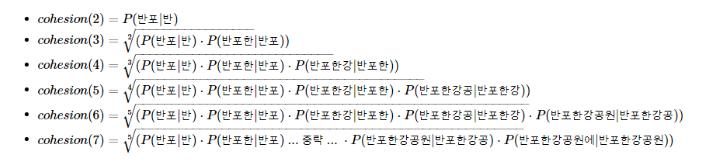

반포한강이 반포한보다 응집 확률이 높다.

In [11]:
# '반포한'의 응집 확률을 계산
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [12]:
# '반포한강'의 응집 확률을 계산
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

반포한강공원이 응집 확률이 더 높다. 응집도를 통해 판단하기에 하나의 단어로 판단하기에 가장 적합한 문자열을 찾을 수 있다. 

이것을 활용하면 아까 신조어였던 '에이비식스', '이대휘'등이 형태소 분석에서 쪼개진 것을 "자주 연결되어 등장한다면 한 단어라고 판단"하여 해결할 수 있겠다.

In [13]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

#### 4) 브랜팅 엔트로피

Branching Entropy는 확률 분포의 엔트로피값을 사용합니다. 이는 주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도이다.


브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도로 비유해봅시다. 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 되면서 점점 줄어드는 양상을 보인다.

ex) 정답이 디스플레이인데 앞 글자 하나씩 말해서 정답을 맞춰보도록 해보자

'디'만 나오는 것과 "디스플"이 나온 것의 정답 확률은 "디스플"이 높다.

따라서 브랜칭 엔트로피는 헷갈리는 정도이니 많이 공개되었을 수록 점수가 낮아진다.

'디스' 다음에는 다양한 문자가 올 수 있으니까 1.63이라는 값을 가지는 반면, '디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 0이란 값을 가진다.

In [14]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [15]:
word_score_table["디스플"].right_branching_entropy

-0.0

갑자기 값이 증가합니다. 그 이유는 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어와 같은 다양한 경우가 있을 수 있기 때문 이는 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피 값이 증가하게 됨을 의미. 그리고 이 값으로 단어를 판단하는 것이 가능.

In [16]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

#### 5) 반복도는 문장 전제

SNS나 채팅 데이터와 같은 한국어 데이터의 경우에는 ㅋㅋ, ㅎㅎ 등의 이모티콘의 경우 불필요하게 연속되는 경우가 많은데 ㅋㅋ, ㅋㅋㅋ, ㅋㅋㅋㅋ와 같은 경우를 모두 서로 다른 단어로 처리하는 것은 불필요하다. 이에 반복되는 것은 하나로 정규화시켜준다.

In [17]:
from soynlp.normalizer import *

In [18]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


#### 6) konlpy 커스터마이징

아래의 상황에서  '은경이'는 사람 이름이므로 제대로 된 결과를 얻기 위해서는 '은', '경이'와 같이 글자가 분리되는 것이 아니라 '은경이' 또는 최소한 '은경'이라는 단어 토큰을 얻어야만 한다.

이런 경우에는 형태소 분석기에 사용자 사전을 추가해줄 수 있습니다. '은경이'는 하나의 단어이기 때문에 분리하지말라고 형태소 분석기에 알려주는 것이다.

In [ ]:
형태소 분석 입력 : '은경이는 사무실로 갔습니다.'
형태소 분석 결과 : ['은', '경이', '는', '사무실', '로', '갔습니다', '.']

In [19]:
pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 881 kB 7.6 MB/s 


add_dic를 하면 원래 은, 경이로 형태소를 분석하다가 은경이로 보기 시작한다.

In [20]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs('은경이는 사무실로 갔습니다.')

/usr/local/lib/python3.8/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다', '.']

In [21]:
twitter.add_dictionary('은경이', 'Noun')

In [22]:
twitter.morphs('은경이는 사무실로 갔습니다.')

['은경이', '는', '사무실', '로', '갔습니다', '.']